In [158]:
# notebook setup

# automatically reload modules when they change
%load_ext autoreload
%autoreload 2

# Hide annoying warnings that we can ignore
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Uncomment this to display value of assignment statements at end of scells (in addition to expressions as normal).
# This is useful for when running workshops from a notebook.
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Interactive Data Visualisation with Python

* We're going to use JupyterLab, Pandas, Plotly, and ipywidgets to explore and analyse a dataset
* Please ask questions in the Q&A!
* We'll share the notebook at the end :)


## Jupyter Notebooks

Interactive development environment (IDE) that's great for data analysis.

A Jupyter Notebook is a sequence of _cells_ that are of two main types:
1. **Text cells** (using Markdown)
2. **Code cells** (Python for us)

Cells are run, and produce visual outputs:
* Standard output produced by Python 
* Tabular data
* Visualisations
* Other HTML

## The Dataset

The Melbourne City Council's Pedestrian Counting System datasets.

_This dataset contains hourly pedestrian counts since 2009 from pedestrian sensor devices located across the city. The data is updated on a monthly basis and can be used to determine variations in pedestrian activity throughout the day._

Two separate datasets:

1. [The Pedestrian Counting System dataset](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp), which contains the hourly traffic data.
2. [Pedestrian Sensor Locations](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234) dataset, which contains data about the sensors collecting the above data. 

[Live dashboard](http://www.pedestrian.melbourne.vic.gov.au)

In [125]:
# get the paths to our data

import os
from pathlib import Path

data_path = Path(os.getenv("DATA_PATH", "../data"))
sensor_csv_path = data_path / "Pedestrian_Counting_System_-_Sensor_Locations.csv"
counts_csv_path = data_path / "Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv";

## A Crash Course in Pandas

Pandas is a Python tool for general purpose data manipulation and analysis.

Kind of like Excel + SQL for Python... but so much more!

Two main data types:
* `DataFrame`
* `Series`


Let's load the dataset of hourly pedestrian counts:

In [3]:
# this may take a little while to run
import pandas as pd

counts_df = pd.read_csv(counts_csv_path, index_col="ID", parse_dates=["Date_Time"]);

In [4]:
type(counts_df)

pandas.core.frame.DataFrame

In [5]:
counts_df.head()

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2887628,2019-11-01 17:00:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
2887629,2019-11-01 17:00:00,2019,November,1,Friday,17,39,Alfred Place,604
2887630,2019-11-01 17:00:00,2019,November,1,Friday,17,37,Lygon St (East),216
2887631,2019-11-01 17:00:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
2887632,2019-11-01 17:00:00,2019,November,1,Friday,17,36,Queen St (West),774


In [126]:
counts_df.dtypes

Date_Time        datetime64[ns]
Year                      int64
Month                    object
Mdate                     int64
Day                      object
Time                      int64
Sensor_ID                 int64
Sensor_Name              object
Hourly_Counts             int64
dtype: object

#### Working with `DataFrame` and `Series` Objects

Think of `DataFrame`s as 2-dimensional data structure: **rows** x **columns**

In [7]:
counts_df.shape

(3391522, 9)

Each column of a `DataFrame` is a `Series`.

A `Series` is a 1-dimensional data structure.

Like a Python list, but:
* has a type
* has an index

In [8]:
counts_df["Hourly_Counts"]

ID
2887628    300
2887629    604
2887630    216
2887631    627
2887632    774
          ... 
3391518      0
3391519      0
3391520      0
3391521      0
3391522     16
Name: Hourly_Counts, Length: 3391522, dtype: int64

In [9]:
counts_df["Sensor_Name"]

ID
2887628                   Flinders St-Spark La
2887629                           Alfred Place
2887630                        Lygon St (East)
2887631           Lonsdale St-Spring St (West)
2887632                        Queen St (West)
                          ...                 
3391518       Flinders Ln -Degraves St (South)
3391519       Flinders Ln -Degraves St (North)
3391520    Flinders Ln -Degraves St (Crossing)
3391521                    Errol Street (East)
3391522                         Westwood Place
Name: Sensor_Name, Length: 3391522, dtype: object

In [10]:
# filtering the dataframe to Southbank Sensor records

southbank_df = counts_df[counts_df["Sensor_Name"] == "Southbank"]

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2887637,2019-11-01 17:00:00,2019,November,1,Friday,17,35,Southbank,2691
2887692,2019-11-01 18:00:00,2019,November,1,Friday,18,35,Southbank,2292
2887747,2019-11-01 19:00:00,2019,November,1,Friday,19,35,Southbank,2058
2887802,2019-11-01 20:00:00,2019,November,1,Friday,20,35,Southbank,1695
2887857,2019-11-01 21:00:00,2019,November,1,Friday,21,35,Southbank,1825
...,...,...,...,...,...,...,...,...,...
3391259,2020-10-31 19:00:00,2020,October,31,Saturday,19,35,Southbank,1209
3391319,2020-10-31 20:00:00,2020,October,31,Saturday,20,35,Southbank,1185
3391379,2020-10-31 21:00:00,2020,October,31,Saturday,21,35,Southbank,941


In [11]:
# filtering further to only saturday 

southbank_sat_df = southbank_df[southbank_df["Day"] == "Saturday"]

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2888022,2019-11-02 00:00:00,2019,November,2,Saturday,0,35,Southbank,421
2888077,2019-11-02 01:00:00,2019,November,2,Saturday,1,35,Southbank,304
2888132,2019-11-02 02:00:00,2019,November,2,Saturday,2,35,Southbank,95
2888187,2019-11-02 03:00:00,2019,November,2,Saturday,3,35,Southbank,36
2888242,2019-11-02 04:00:00,2019,November,2,Saturday,4,35,Southbank,22
...,...,...,...,...,...,...,...,...,...
3391259,2020-10-31 19:00:00,2020,October,31,Saturday,19,35,Southbank,1209
3391319,2020-10-31 20:00:00,2020,October,31,Saturday,20,35,Southbank,1185
3391379,2020-10-31 21:00:00,2020,October,31,Saturday,21,35,Southbank,941


In [12]:
# Total pedestrians through Southbank on Saturday

southbank_sat_df["Hourly_Counts"].sum()

8621127

In [13]:
# vectorised arithmetic

southbank_sat_df["Hourly_Counts"] + 1

ID
2888022     422
2888077     305
2888132      96
2888187      37
2888242      23
           ... 
3391259    1210
3391319    1186
3391379     942
3391439     710
3391499     525
Name: Hourly_Counts, Length: 5664, dtype: int64

**Key points:**

When working with Pandas, you are manipulating `DataFrame` objects and their columns, which are `Series` objects.

Try to use vectorised operations over these data structures rather than `for` loops.

## Exploratory Data Analysis (EDA)

Dive into your data and get your hands dirty in order to:
* Become familiar with your data
* Test assumptions and identify data quality issues
* Understand applications the data supports (and does not support!)
* Generate hypotheses to test

Involves: 
* Extracting summary stastistics
* Visualising your data
* Testing for corelations betwen variables

### Let's do some EDA!

In [14]:
# how many years in the data set?

sorted(counts_df["Year"].unique())

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [15]:
# how many sensors in the dataset?

len(counts_df["Sensor_Name"].unique())

74

In [16]:
# how many total pedestrian counts each year?

year_counts = counts_df.groupby("Year")["Hourly_Counts"].sum()

Year
2009     62650110
2010     93459437
2011     90571965
2012    102215521
2013    117389820
2014    169500386
2015    209099687
2016    228757880
2017    216586414
2018    261909318
2019    266411675
2020     98032895
Name: Hourly_Counts, dtype: int64

In [17]:
# turn it into a DataFrame

year_counts_df = counts_df.groupby("Year")["Hourly_Counts"].sum().reset_index(name="total_counts")

,Year,total_counts
0,2009,62650110
1,2010,93459437
2,2011,90571965
3,2012,102215521
4,2013,117389820
5,2014,169500386
6,2015,209099687
7,2016,228757880
8,2017,216586414
9,2018,261909318


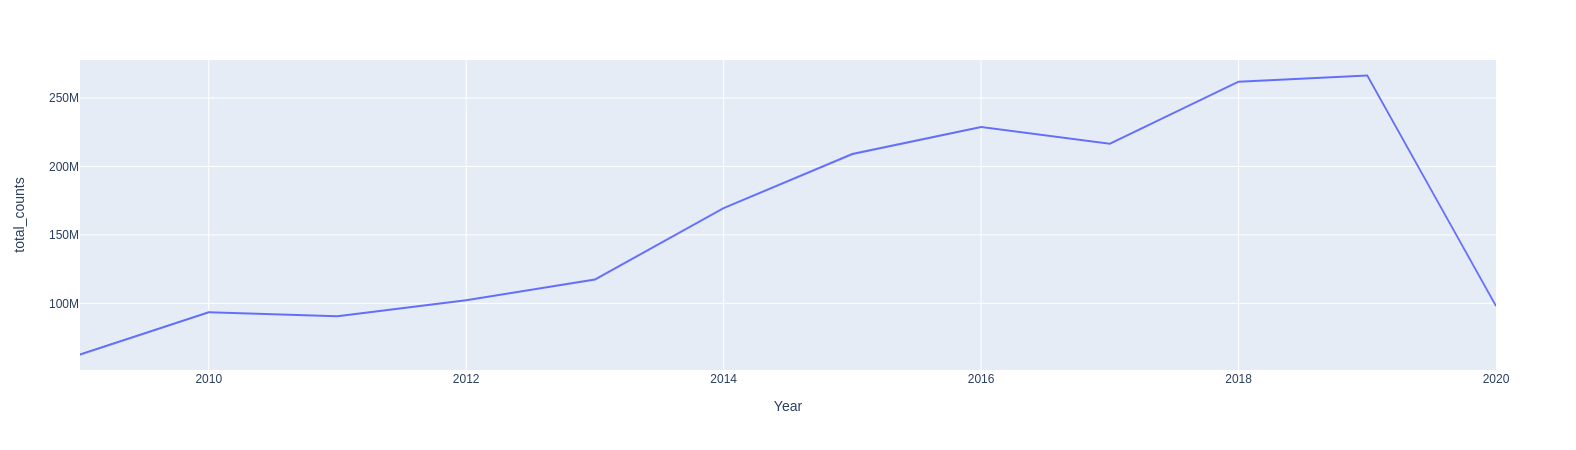

In [59]:
import plotly.express as px

px.line(year_counts_df, x="Year", y="total_counts")

Wow, look how much pedestrian traffic is increasing every year!

But hang on a second...

In [19]:
# lets count the number of sensors each year

num_sensors_df = counts_df.groupby("Year")["Sensor_Name"].nunique().reset_index(name="number_sensors")

,Year,number_sensors
0,2009,18
1,2010,18
2,2011,18
3,2012,18
4,2013,32
5,2014,35
6,2015,43
7,2016,43
8,2017,52
9,2018,54


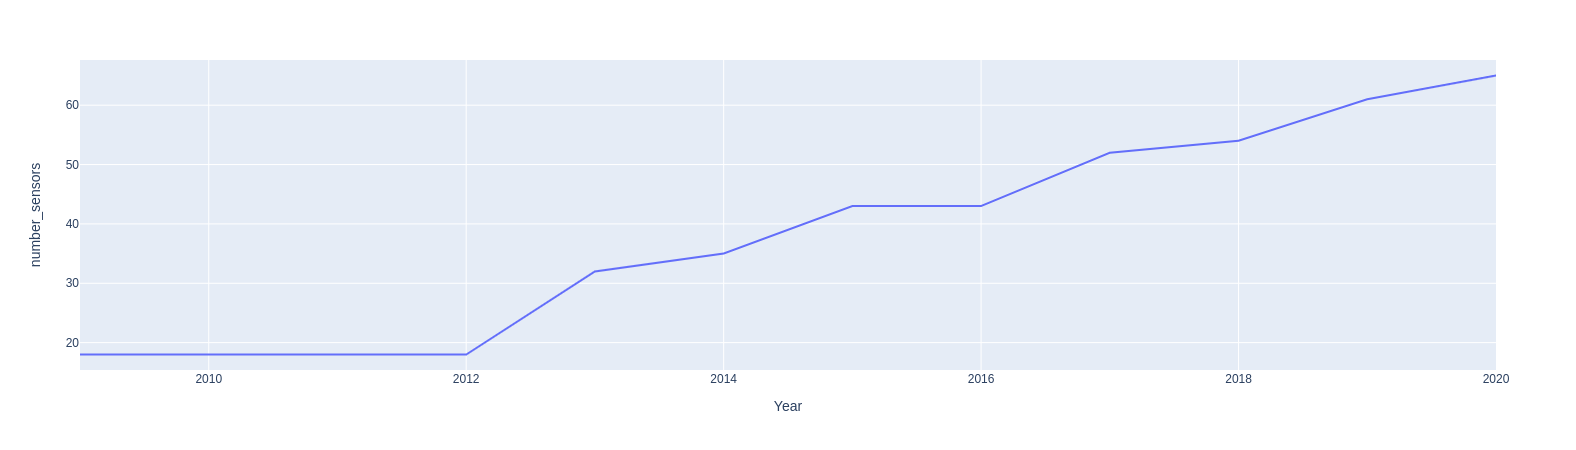

In [20]:
px.line(num_sensors_df, x="Year", y="number_sensors")

The number of sensors are also rising, which means individual pedestrians are being counted more times by sensors each year.

Be careful to think about the process that generates your data!

In [67]:
# get total traffic across all sensors

total_df = counts_df.groupby("Sensor_Name")["Hourly_Counts"].sum().reset_index(name="total_counts")

,Sensor_Name,total_counts
0,231 Bourke St,974068
1,Alfred Place,10464775
2,Australia on Collins,32371956
3,Birrarung Marr,28966989
4,Bourke St - Spencer St (North),10912686
...,...,...
69,Town Hall (West),134933031
70,Victoria Point,17015069
71,Waterfront City,9572789
72,Webb Bridge,14838442


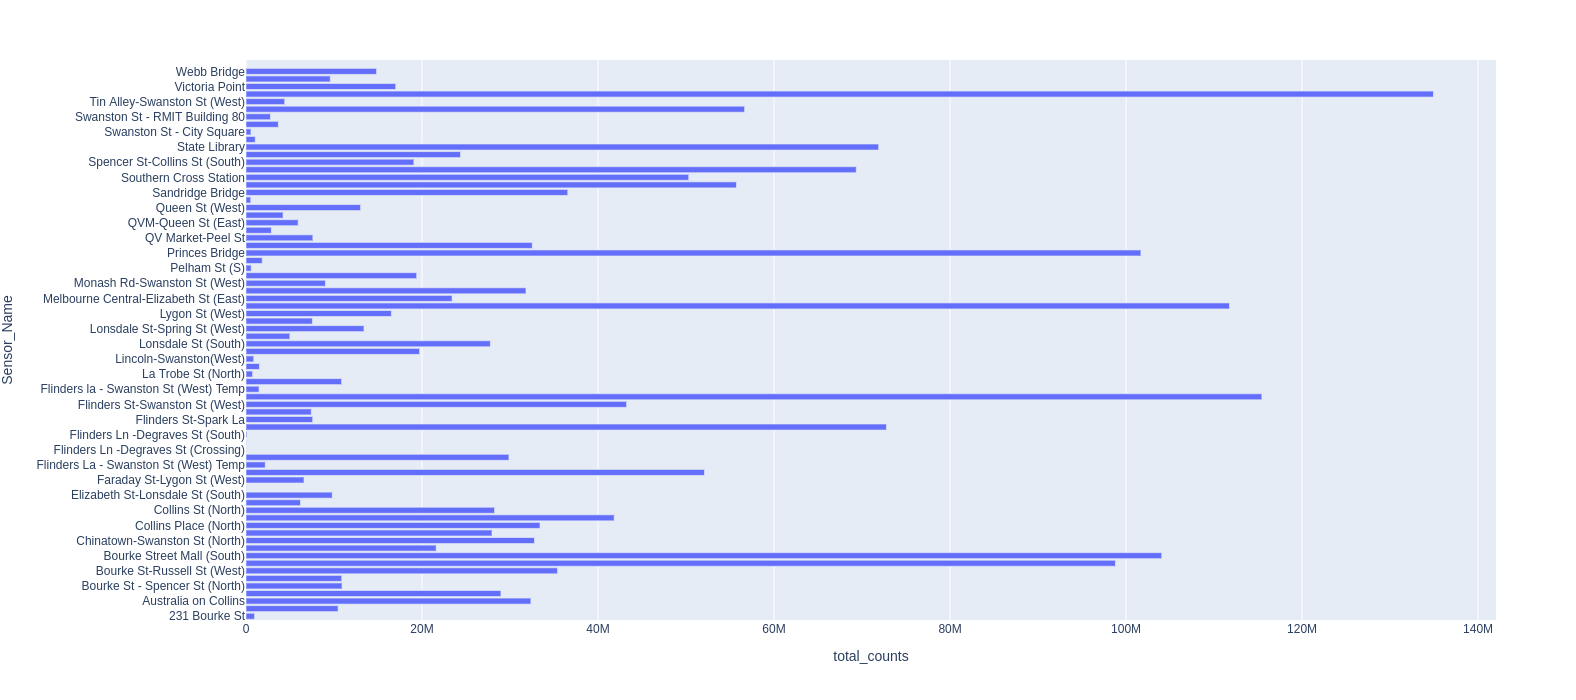

In [71]:
px.bar(
    total_df,
    x="total_counts",
    y="Sensor_Name",
    orientation="h",
    height=700
)

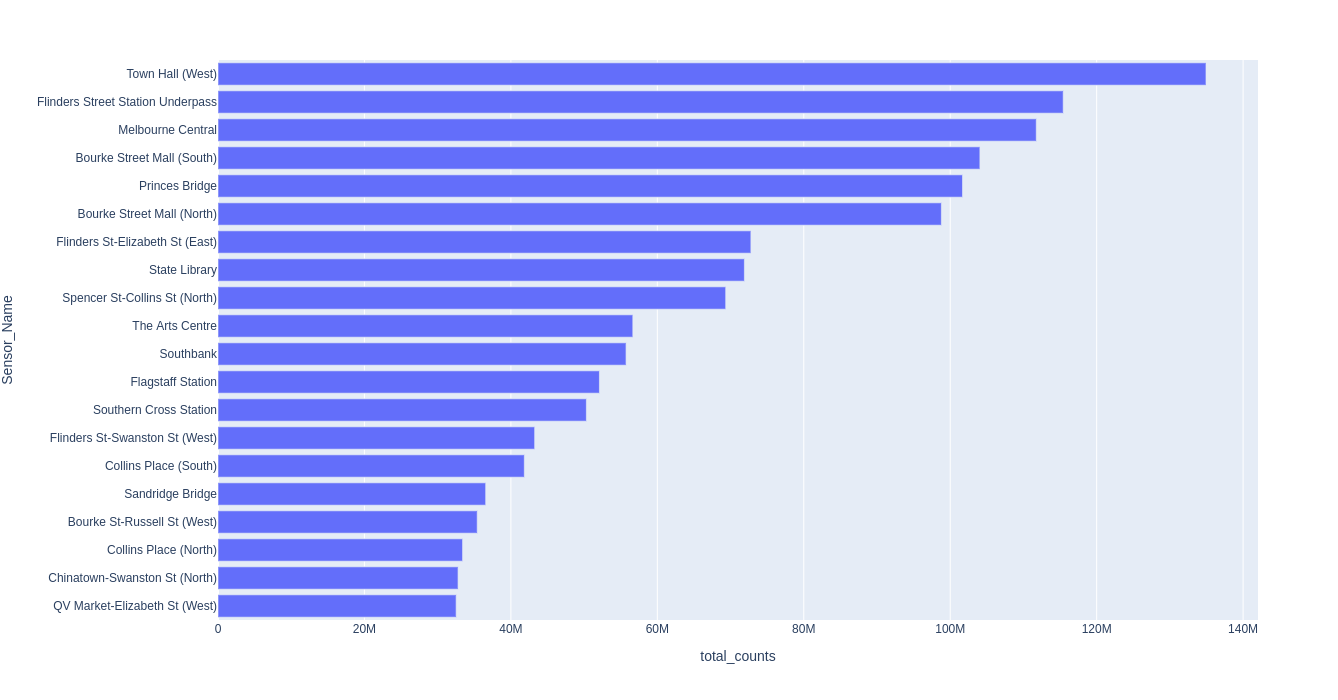

In [76]:
px.bar(
    total_df.sort_values(by="total_counts").tail(20),
    x="total_counts",
    y="Sensor_Name",
    orientation="h",
    height=700
)

## Q1: _What does monthly traffic look like across years?_

Let's start by looking at one year

In [22]:
# filter down to 2019

counts_2019_df = counts_df[counts_df["Year"] == 2019]

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2887628,2019-11-01 17:00:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
2887629,2019-11-01 17:00:00,2019,November,1,Friday,17,39,Alfred Place,604
2887630,2019-11-01 17:00:00,2019,November,1,Friday,17,37,Lygon St (East),216
2887631,2019-11-01 17:00:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
2887632,2019-11-01 17:00:00,2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...
2886659,2019-10-31 23:00:00,2019,October,31,Thursday,23,57,Bourke St Bridge,73
2886660,2019-10-31 23:00:00,2019,October,31,Thursday,23,58,Bourke St - Spencer St (North),312
2886661,2019-10-31 23:00:00,2019,October,31,Thursday,23,59,Swanston St - RMIT Building 80,3


In [23]:
# group by Month

months_2019_df = counts_2019_df.groupby("Month")["Hourly_Counts"].sum().reset_index(name="total_counts")

,Month,total_counts
0,April,22818120
1,August,23896524
2,December,24931172
3,February,18816254
4,January,18904686
5,July,22744685
6,June,20194222
7,March,23181242
8,May,21590920
9,November,23487511


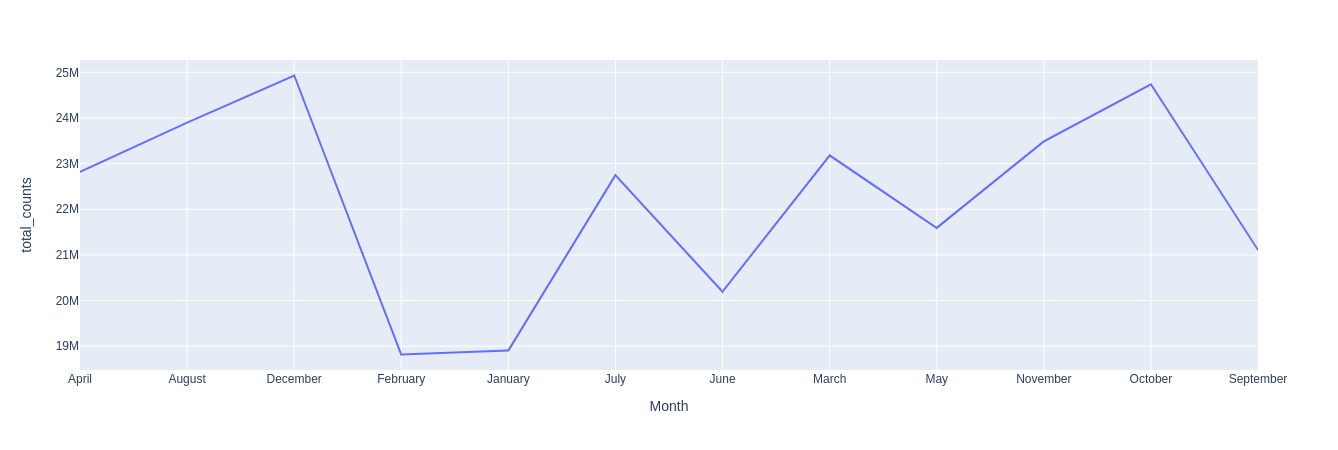

In [24]:
px.line(months_2019_df, x="Month", y="total_counts")

Problems:
1. It's alphabetically sorted
2. Data points aren't easily identifable
3. y-axis is truncated
4. Plot is not well documented

Let's fix these!

In [31]:
# sort by month numbers
from datetime import datetime

sorted_months_2019_df = months_2019_df.sort_values(
    by="Month", 
    key=lambda series:pd.to_datetime(series, format="%B").dt.month
)

,Month,total_counts
4,January,18904686
3,February,18816254
7,March,23181242
0,April,22818120
8,May,21590920
6,June,20194222
5,July,22744685
1,August,23896524
11,September,21107792
10,October,24738547


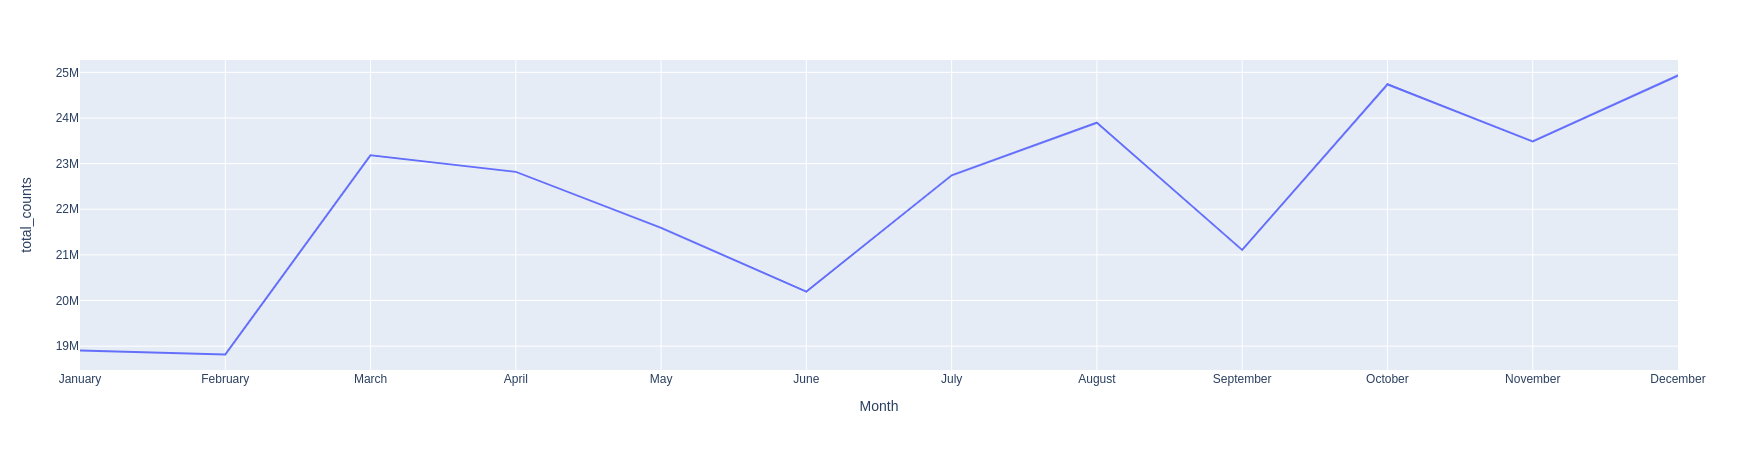

In [33]:
px.line(sorted_months_2019_df, x="Month", y="total_counts")

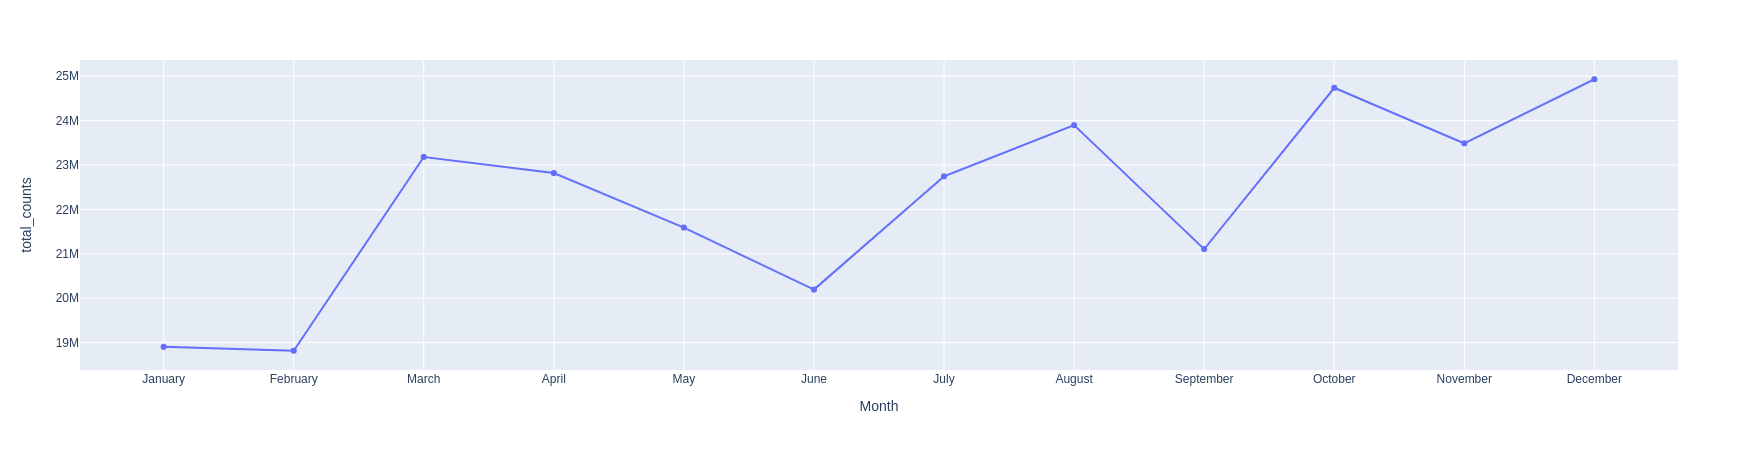

In [36]:
# add markers to data points

figure = px.line(sorted_months_2019_df, x="Month", y="total_counts")
figure.update_traces(mode='lines+markers')

#### __*Hot Tip:*__ Always title your plots!

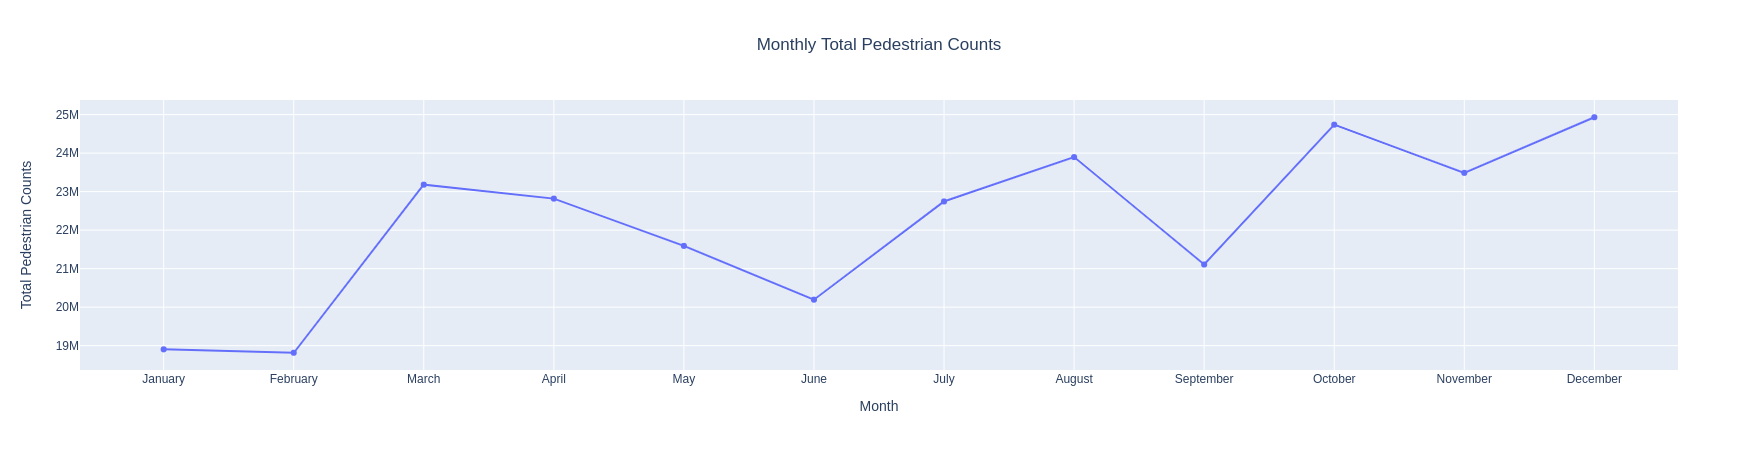

In [37]:
# Improve accessability of the plot with title and better y-axis label

figure = px.line(
    sorted_months_2019_df, 
    x="Month", 
    y="total_counts", 
    title="Monthly Total Pedestrian Counts"
)
figure.update_traces(mode='lines+markers')
figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)



We have a way to visualise monthly traffic over a single year.

Problems:
* It's spread over many notebooks cells
* Changing the year is annoying


#### __*Hot Tip:*__ Move code into reusable functions!

In [103]:
def plot_months(counts_df, year):
    """Plot Monthly traffic for a given year."""
    
    # 1. Collect and shape data
    year_df = counts_df[counts_df["Year"] == year]
    months_df = year_df.groupby("Month")["Hourly_Counts"].sum().reset_index(name="total_counts")
    sorted_months_df = months_df.sort_values(
        by="Month", 
        key=lambda x:pd.to_datetime(x, format="%B").dt.month
    )

    # 2. Make plot
    figure = px.line(
        sorted_months_df, 
        x="Month", 
        y="total_counts", 
        title="Monthly Total Pedestrian Counts",
        width=1500,
        height=500
    )
    
    # 3. Fine-tune plot's appearance 
    figure.update_traces(mode='lines+markers')
    figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)
    
    return figure

**Note:** This is a common pattern when building plots.

1. Collect and shape data
2. Make plot
3. Fine-tune plot's appearance

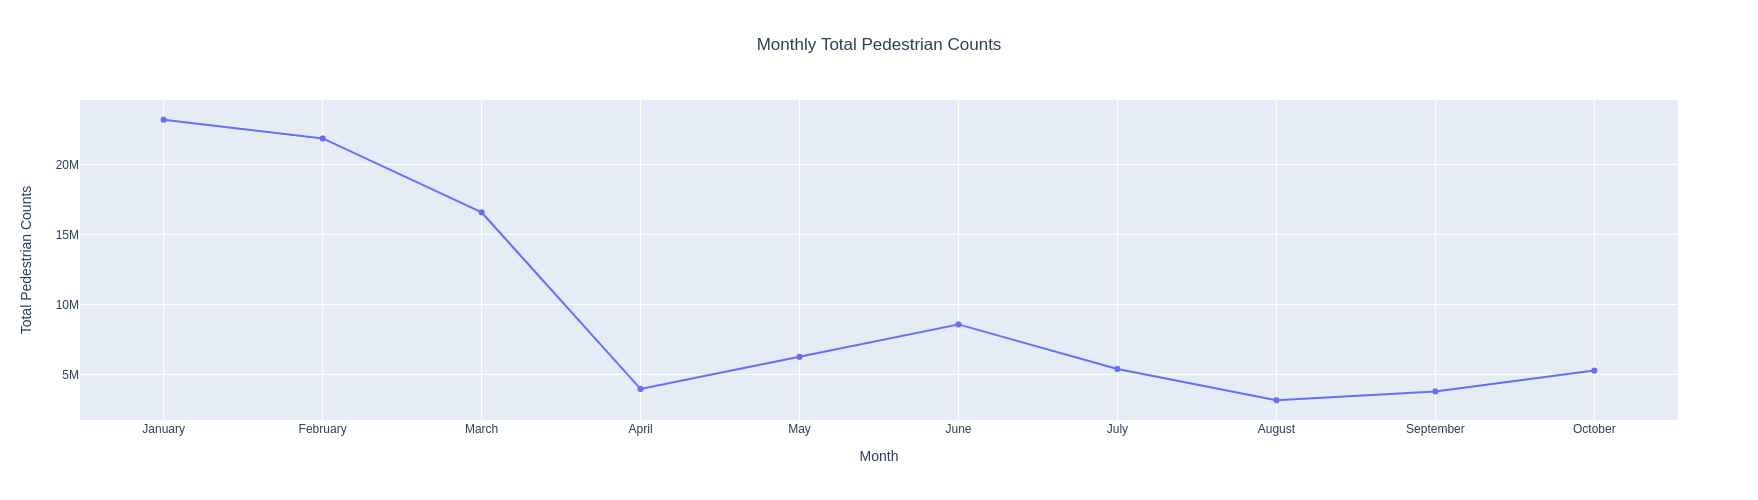

In [104]:
plot_months(counts_df, 2020)

Problem: Answering questions about different years is still slower than would be nicce.


### Using ipywidgets to make an interactive tool!

In [105]:
from ipywidgets import interact, fixed

interact(plot_months, year=2019, counts_df=fixed(counts_df));

interactive(children=(IntSlider(value=2019, description='year', max=6057, min=-2019), Output()), _dom_classes=…

In [106]:
interact(plot_months, year=range(2009, 2021), counts_df=fixed(counts_df));

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

Another problem: truncated y-axis is misleading when comparing.

In [118]:
# add a truncate_y parameter to our function

def plot_months(counts_df, year, truncate_y=False):
    """Plot Monthly traffic for a given year."""
    
    # 1. Collect and shape data
    year_df = counts_df[counts_df["Year"] == year]
    months_df = year_df.groupby("Month")["Hourly_Counts"].sum().reset_index(name="total_counts")
    sorted_months_df = months_df.sort_values(
        by="Month", 
        key=lambda x:pd.to_datetime(x, format="%B").dt.month
    )

    # 2. Make plot
    figure = px.line(
        sorted_months_df, 
        x="Month", 
        y="total_counts", 
        title="Monthly Total Pedestrian Counts",
        width=1500,
        height=500
    )
    
    # 3. Fine-tune plot's appearance 
    figure.update_traces(mode='lines+markers')
    figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)
    if not truncate_y:
        figure.update_layout(yaxis_rangemode='tozero')
    
    return figure

In [119]:
interact(plot_months, year=range(2009, 2021), counts_df=fixed(counts_df));

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

#### __*Hot Tip:*__ Share you interactive visualisation with ngrok and Voila

_Ngrok Demo_

<center>
    <img src="img/reactive_interfaces.png" style="height:90vh"/>
</center>

### Another approach using Plotly Express

In [113]:
counts_df.groupby(["Year", "Month"])["Hourly_Counts"].sum().reset_index(name="total_counts")

,Year,Month,total_counts
0,2009,August,7706029
1,2009,December,8515231
2,2009,July,8027292
3,2009,June,7360072
4,2009,May,7538538
...,...,...,...
133,2020,June,8573779
134,2020,March,16576373
135,2020,May,6257626
136,2020,October,5274979


In [116]:
def plot_all_months(counts_df):
    """Plot Monthly traffic for a given year."""
    
    # 1. Collect and shape data
    # Group by both year and month, then sum the counts for each month
    months_df = counts_df.groupby(["Year", "Month"])["Hourly_Counts"].sum().reset_index(name="total_counts")
    sorted_months_df = months_df.sort_values(
        by="Month", 
        key=lambda x:pd.to_datetime(x, format="%B").dt.month
    )

    # 2. Make plot
    figure = px.line(
        sorted_months_df, 
        x="Month", 
        y="total_counts", 
        title="Monthly Total Pedestrian Counts",
        color="Year",
        width=1500,
        height=500
    )
    
    # 3. Fine-tune plot's appearance 
    figure.update_traces(mode='lines+markers')
    figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)
    return figure

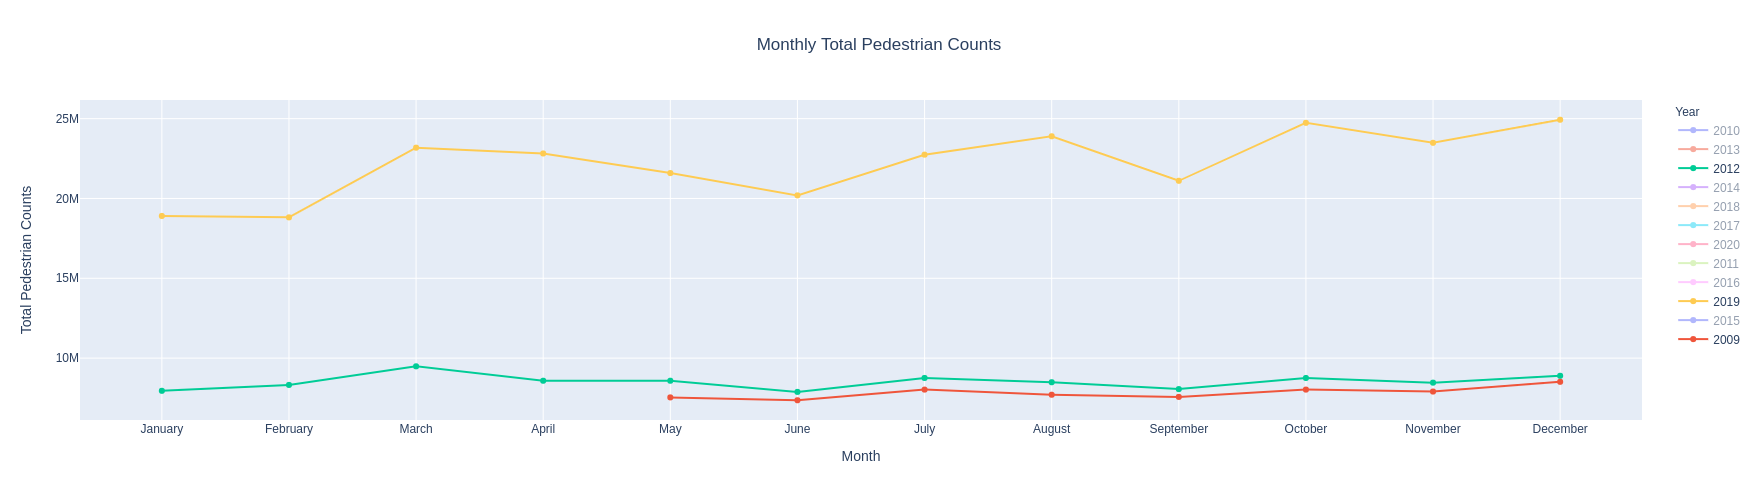

In [117]:
plot_all_months(counts_df)

## Q2: _What does daily traffic look like?_

In [181]:
def plot_sensor_traffic(df, same_yscale=False, max_sensors=5):
    """Plot hourly traffic for one or more sensors"""

    # 1. Collect and shape data:
    # Filter data to the top `max_sensors` number of sensors
    target_sensors = df.groupby("Sensor_Name")["Hourly_Counts"].sum().sort_values(ascending=False)[:max_sensors]
    df = df[df["Sensor_Name"].isin(set(target_sensors.index))]

    # 2. Make plot
    figure = px.line(
        df,
        y="Hourly_Counts",
        x="Date_Time",
        facet_row="Sensor_Name",
        title="Hourly Pedestrian Traffic by Sensor",
        category_orders={"Sensor_Name": list(target_sensors.index)},
    )
    
    # 3. Fine-tune plot's appearance
    figure.update_layout(title_x=0.5)
    figure.update_yaxes(
        matches=None if same_yscale else "y",
        showgrid=False,
        zeroline=False,
        title_text=None,
    )
    figure.update_xaxes(showgrid=True, title_text=None)
    figure.for_each_annotation(
        lambda a: a.update(textangle=0, text=a.text.split("=")[-1])
    )
    return figure

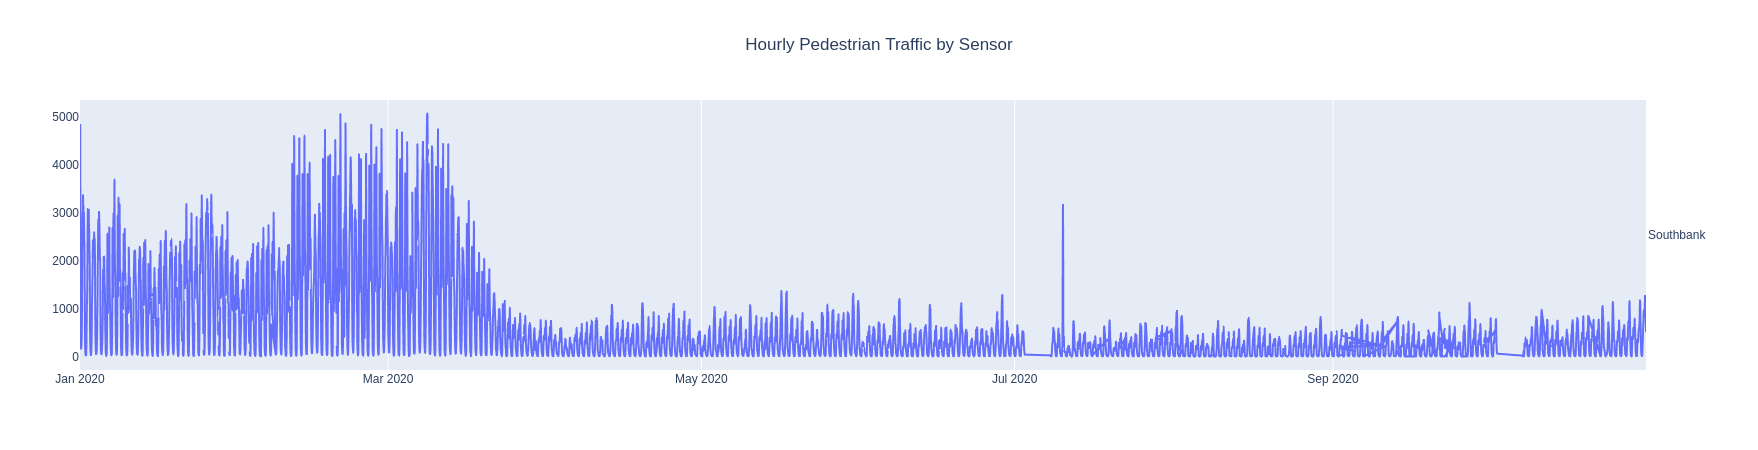

In [182]:
from melbviz.utils import filter_pedestrian_df

filtered_df = filter_pedestrian_df(counts_df, year=2020, sensor="Southbank")
plot_sensor_traffic(filtered_df)

### Let's give it the ipywidgets treatment!

We need to:
1. get the possible inputs each function paramer can take
2. create a helper function to do filtering and call the `plot_sensor_traffic` function
3. wrap the helper function with ipywidget's `interact` 

In [196]:
# get the possible values for each widget

from melbviz.utils import sort_months

year_options = sorted(counts_df["Year"].unique())
month_options = sort_months(counts_df["Month"].unique())
sensor_options = sorted(counts_df["Sensor_Name"].unique());

In [201]:
# create the helper function

@interact(year=year_options, month=month_options, sensor=sensor_options, df=fixed(counts_df))
def plot(year, month, sensor, df):
    pedestrian_df = filter_pedestrian_df(df, year=year, month=month, sensor=sensor)
    if len(pedestrian_df) == 0:
        return f"No records for {year}, {month}, {sensor}"
    figure = plot_sensor_traffic(pedestrian_df)
    return figure

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

Problem: the widgets don't know which sensors have data for different years.

We need to make the options for month and sensor update dynamically based on the year. 

In [204]:
from ipywidgets import Dropdown

# create Dropdown widgets explicitly 
year_widget = Dropdown(options=data.years)
month_widget = Dropdown(options=data.months)
sensor_widget = Dropdown(options=data.sensors)


def update_widgets(*args):
    """Function to update widget values"""
    df = filter_pedestrian_df(counts_df, year=year_widget.value)
    month_widget.options = sort_months(df["Month"].unique())
    sensor_widget.options = sorted(df["Sensor_Name"].unique())

# make changes to the year Dropdown trigger the update_widgets function to run
year_widget.observe(update_widgets)

# now use the Dropdown widgets in the call to interact

@interact(year=year_widget, month=month_widget, sensor=sensor_widget, df=fixed(counts_df))
def better_plotplot(year, month, sensor, df):
    pedestrian_df = filter_pedestrian_df(df, year=year, month=month, sensor=sensor)
    if len(pedestrian_df) == 0:
        return f"No records for {year}, {month}, {sensor}"
    figure = plot_sensor_traffic(pedestrian_df)
    return figure

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

## Q3: _What are the most trafficked parts of Melbourne’s CBD?_

In [159]:
# load the second dataset with sensor metadata

sensors_df = pd.read_csv(sensor_csv_path, index_col="sensor_id")

,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
sensor_id,,,,,,,,,,
59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)"
20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)"
34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)"
57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)"
40,Lonsdale St-Spring St (West),Spr201_T,2015/01/19,A,NaN,South,North,-37.809993,144.972276,"(-37.80999341, 144.97227588)"
...,...,...,...,...,...,...,...,...,...,...
29,St Kilda Rd-Alexandra Gardens,AG_T,2013/10/11,A,sensor upgraded from laser to 3D on 19/12/2019,North,South,-37.819658,144.968635,"(-37.81965808, 144.96863453)"
70,Errol Street (East),Errol20_T,2020/10/12,A,NaN,North,South,-37.804570,144.949462,"(-37.80456984, 144.94946229)"
71,Westwood Place,WestWP_T,2020/10/16,A,NaN,North,South,-37.812358,144.971370,"(-37.81235775, 144.97136962)"


In [154]:
def plot_sensor_map(df, height=None):
    """Plot a spatial scatter plot of sensor traffic."""
    
    # 1. Collect and shape data:
    # Get the total counts for each sensor
    agg_dict = {
        "Hourly_Counts": sum,
        "latitude": lambda x: x.iloc[0],
        "longitude": lambda x: x.iloc[0],
    }
    sensor_totals_df = df.groupby("Sensor_Name").agg(agg_dict).reset_index()
    sensor_totals_df = sensor_totals_df.rename(columns={"Hourly_Counts": "Total Counts"})
    
    # 2. Make plot
    figure = px.scatter_mapbox(
        sensor_totals_df,
        lat="latitude",
        lon="longitude",
        color="Total Counts",
        size="Total Counts",
        text="Sensor_Name",
        height=height,
        color_continuous_scale=px.colors.sequential.Plasma,
        size_max=50,
        zoom=13,
        title="Sensor Traffic",
    )

    # 3. Fine-tune plot's appearance
    figure.update_layout(title_x=0.5)
    return figure

In [160]:
# This function requires sensor lat/lon information, so we'll cheat and use an already joined dataset:

from melbviz.pedestrian import PedestrianDataset
from melbviz.config import COUNTS_CSV_PATH, SENSOR_CSV_PATH

data = PedestrianDataset.load(COUNTS_CSV_PATH, sensor_csv_path=SENSOR_CSV_PATH);
joined_df = data.df

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,datetime_flat_year,sensor_id,latitude,longitude
926716,2009-05-01 00:00:00,2009,May,1,Friday,0,17,Collins Place (South),28,2000-05-01 00:00:00,17,-37.813625,144.973236
832041,2009-05-01 00:00:00,2009,May,1,Friday,0,4,Town Hall (West),209,2000-05-01 00:00:00,4,-37.814880,144.966088
1644818,2009-05-01 00:00:00,2009,May,1,Friday,0,10,Victoria Point,8,2000-05-01 00:00:00,10,-37.818765,144.947105
1745220,2009-05-01 00:00:00,2009,May,1,Friday,0,12,New Quay,2,2000-05-01 00:00:00,12,-37.814580,144.942924
2321324,2009-05-01 00:00:00,2009,May,1,Friday,0,14,Sandridge Bridge,95,2000-05-01 00:00:00,14,-37.820112,144.962919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450890,2020-10-31 23:00:00,2020,October,31,Saturday,23,3,Melbourne Central,540,2000-10-31 23:00:00,3,-37.811015,144.964295
1266133,2020-10-31 23:00:00,2020,October,31,Saturday,23,2,Bourke Street Mall (South),98,2000-10-31 23:00:00,2,-37.813807,144.965167
3076180,2020-10-31 23:00:00,2020,October,31,Saturday,23,31,Lygon St (West),1022,2000-10-31 23:00:00,31,-37.801697,144.966589
777975,2020-10-31 23:00:00,2020,October,31,Saturday,23,57,Bourke St Bridge,33,2000-10-31 23:00:00,57,-37.817673,144.950256


In [162]:
# Sign up yo get your own Mapbox API key and change the line below to use it 
# https://www.mapbox.com

from melbviz.config import MAPBOX_KEY

px.set_mapbox_access_token(MAPBOX_KEY)

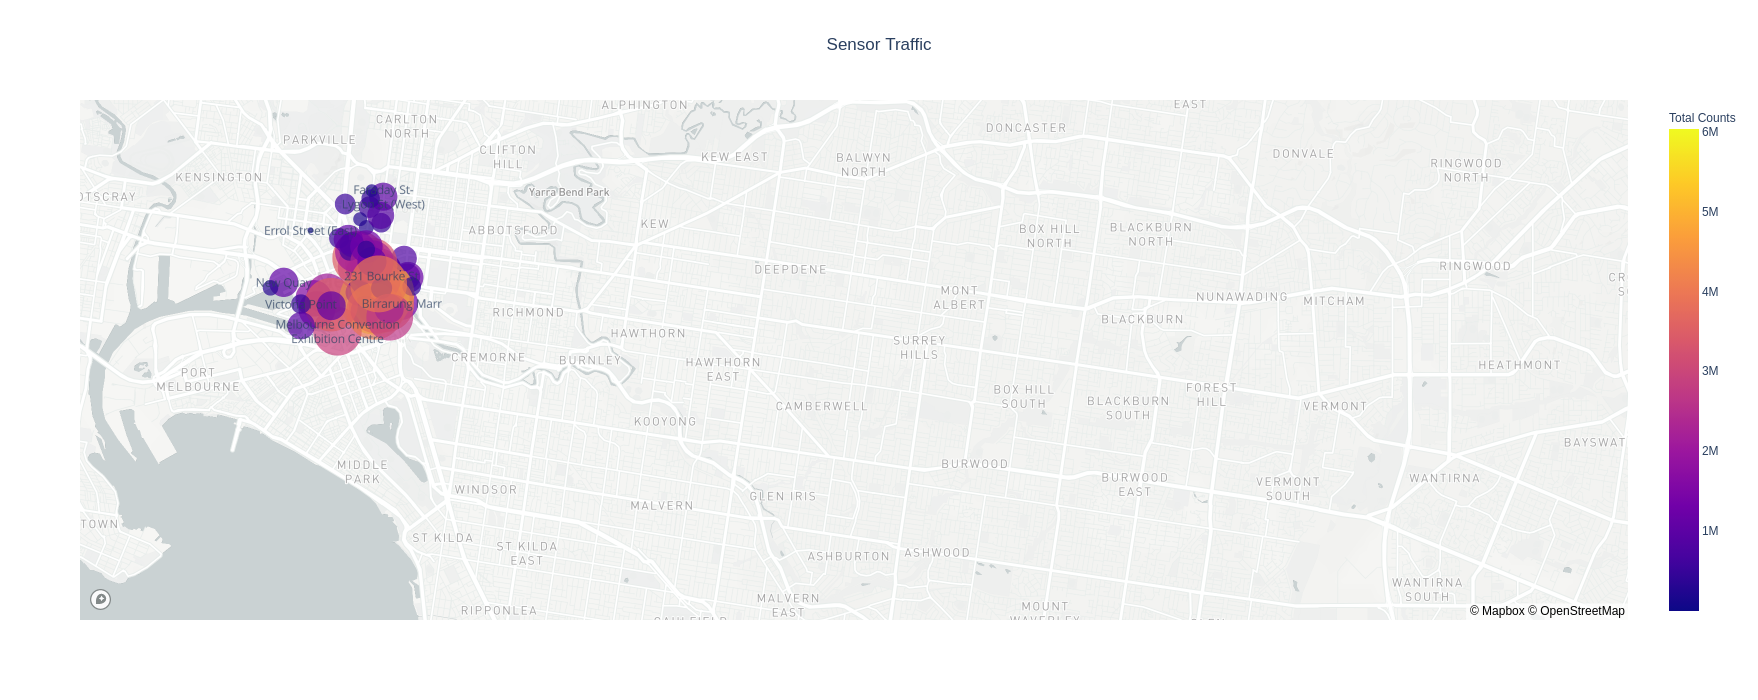

In [157]:
# ok let's do it! 

filtered_df = filter_pedestrian_df(joined_df, year=2020)

plot_sensor_map(filtered_df, height=700)

## What if we want to deploy these visualisations as an interactive web app? 

### Dashboarding libraries for Python:

<img src="img/data_app_libs.png" style="height:300px"/>

See my talk comparing these libraries: [youtu.be/jI5zLf9Hvd8](https://youtu.be/jI5zLf9Hvd8)

## Summary

**Why visualise data?**
* Powerful tool for discovering and communiating insights
* Summary statistics can mislead
* Visual representations of data help patterns jump out
* Important for doing exploratory data analyis

**Why interactive data visualisation?**
* Tighter analysis feedback loop >> quicker time to insights  
* Can make reusable analytic tools
* Self-service analysis (eg dashboards)

**Strategies for Interactivity**
1. Use a library like Plotly, Bokeh, Altair with out-of-the-box interactivity
2. Use ipywidgets to create interactive tools
3. Use Voila to convert your interactive notebook to a Dashboard
4. Other powerful options to go further: Dash, Panel, Streamlit (see my talk comparing: [youtu.be/jI5zLf9Hvd8](https://youtu.be/jI5zLf9Hvd8))

## How to get started?

### 1. Install Jupyter Lab
I recommend the Anaconda Python distribution: [anaconda.com](https://www.anaconda.com)

<img src="img/anaconda_logo.png" width="300"/>

### 2. Pick a visualisation library to use

Choose a column and spend some time getting to know it.

<center>
    <img src="img/python_viz_libs.svg" style="height:90vh"/>
</center>

### 3. Find a dataset that you want to explore
* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Kaggle Datasets](https://www.kaggle.com/datasets)
* Local or national data portals (eg [City of Melbourne Open Data](https://data.melbourne.vic.gov.au))

### 4. Have fun!

### Links for this presentation

<table>
    <tr>
        <td><img src="img/qrcode_repo.svg" style="height:500px"/></td>
        <td><img src="img/qrcode_binder.svg" style="height:500px"/></td>
    </tr>
    <tr>
        <td><center><h3><a href="https://github.com/ned2/melbviz">GitHub Repository for this notebook</a></h3></center></td>
        <td><center><h3><a href="https://mybinder.org/v2/gh/ned2/melbviz/HEAD?filepath=notebooks%2Finteractive_data_viz.ipynb">Live environment for running the notebook</a></h3></center></td>
    </tr>
</table>

# Q & A!